# **Análisis del proyecto de Juan sobre Predicción de Atrasos en Vuelos**

**Introducción:**
Durante el desarrollo de este proyecto, se llevaron a cabo diversas tareas de análisis de datos y modelado con el objetivo de predecir atrasos en vuelos. Se exploraron los datos iniciales y se aplicaron varias técnicas de procesamiento, incluyendo la construcción de nuevos atributos y la estandarización de los datos. Además, se probaron varios modelos de aprendizaje automático, se ajustaron hiperparámetros y se evaluaron sus resultados. Este es un notebook de investigación basado en lo creado por Juan y budcó expandir ciertos aproaches que Juan n cubrió, en especial, implementar técnicas distintas en lso modelos utilzados e intepretaciones especificas, se detalla el proceso seguido y se presentan los resultados obtenidos. A modo de guía sew sugiere focalizar el Notebook en 3 fases.

* La primera: exploratoria con mpdificaciones en los datos y exposición gráfica simple cmo tablas informativa unicamente.

* la seguna modificación y preparación de los datos (técnicas de regularizacion, encoding, PCA ,etc)

* y la ultima, probar distintas estratégias con modelos que adhieren mejor aun analisis de clasificación predictorio de caracter preliminar binario como Atraso/no atraso.

**Exploración de Datos:**
Se inició el proyecto realizando una exploración de los datos, identificando características clave y tendencias. Se observó que los datos presentaban desafíos, como el desequilibrio entre las clases de atraso, exceso/ausencia de datos para algunosatributos como algunos destinos y la necesidad de manejar atributos categóricos como dificultad general.

**Preprocesamiento de Datos:**
Para abordar los desafíos, se realizaron los siguientes pasos:

1. **Reconstrucción de Datos:** Se reconstruyeron los datos previamente procesados, mejorando la selección de columnas y descartando aquellas que no eran relevantes.

2. **Construcción de Nuevos Atributos:** Se validó la creación de atributos como "dif_min," que refleja la diferencia máxima entre los tiempos de vuelo planificados y operados, y "atraso_15," un indicador binario de atrasos mayores a 15 minutos. son un buen proxy para el alcance preliminar del proyecto.

3. **One-Hot Encoding:** Para manejar atributos categóricos, se aplicó la técnica de one-hot encoding.

4. **Eliminación de Datos No Relevantes:** Se eliminaron filas con valores alfanuméricos en características específicas, ya que representaban un pequeño porcentaje del conjunto de datos. (Feature: Vlo-I/Vlo-O | 0.02% erased).

**Modelado:**
Se probaron varios modelos de aprendizaje automático, incluyendo Regresión Logística, SVM, y XGBoost. Se realizaron ajustes de hiperparámetros y se aplicaron técnicas de regularización como Lasso y Ridge junto a tunning se sus distintas estratégias para optimizar timepo de procesamiento y resultado esperado. Además, se utilizó la técnica de sobremuestreo SMOTE para abordar el desequilibrio de clases.

**Resultados:**
El modelo final de XGBoost con SMOTE y estandarización mostró mejoras significativas en términos de precisión y recall en comparación con los modelos anteriores. El F1-score balanceado indicó un equilibrio razonable entre precision y recall. La precisión general del modelo fue del 82%, aunque la precisión para la clasificación de "Atraso" sigue siendo un área de mejora pero un rfecall de un 0.78 es un buen paso en la dirección correcta.

**Conclusión:**
En resumen, este proyecto involucró un proceso completo de exploración, preprocesamiento y modelado de datos para predecir atrasos en vuelos. Hubo varios cambios de dirección en su desarrollo, como la prueba con otros modelos que no se adjuntaron por entregar nulo valor analítico. pero sirvió como referencia y descarte del tipo de objetivo del analisis y el tipo de variables en juego. Si bien con XGboost se lograron mejoras notables en la precisión y el recall luego de realizar multiples ocmvbinaciones de otras técnicas y 'tuneo', todavía existen oportunidades para ajustes adicionales y mejoras en la detección de atrasos. como ejercicio y mqueteo, el proyecto representa un avance significativo en la dirección correcta y sienta las bases para futuros desarrollos y refinamientos una ves se seleccione un dataset de optima calidad y un objetivo conciso a explorar bajo los algoritmos preliminares.

**Librerías Claves Utilizadas:**
- Pandas
- Scikit-learn
- XGBoost
- Imbalanced-learn (SMOTE)
- Matplotlib
- Seaborn

**Duración del Proyecto:**
El proyecto se realizó en un total de aproximadamente 8-9 horas distribuidas en varias sesiones de trabajo a lo largo de 4 días efectivos.


**NORA: para correr este notebook es recomendable cargar el dataset_SCL.csv que se suministró en el desafío. Por favor, hacer uso de los codeblocks a continuación o de su manera favoritas, para cargarlo de forma óptima**

#### **Loading the Data**

In [3]:
#Se importan las librerías necesarias para el problema
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msng
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
from google.colab import files
uploaded = files.upload()
#La ruta local es #C:\Users\JorgeAmaya\Desktop\NeuralWork4daysChallenge

Saving dataset_SCL.csv to dataset_SCL.csv


In [4]:
df = pd.read_csv('dataset_SCL.csv')

In [5]:
df.shape

(68206, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


Verificación de Datos Nulos:

Verificamos si hay valores nulos en el DataFrame y ver cómo manejarlos (eliminar filas o imputar valores).

In [7]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos
df = df.dropna()


Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64


temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no

In [8]:
from datetime import datetime

def temporada_alta(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)

    if ((fecha >= range1_min and fecha <= range1_max) or
        (fecha >= range2_min and fecha <= range2_max) or
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0

In [9]:
df['temporada_alta'] = df['Fecha-I'].apply(temporada_alta)

In [10]:
df['temporada_alta'].value_counts()

0    46174
1    22031
Name: temporada_alta, dtype: int64

dif_min : diferencia en minutos entre Fecha-O y Fecha-I .

In [11]:
def dif_min(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    dif_min = ((fecha_o - fecha_i).total_seconds())/60
    return dif_min


In [12]:
df['dif_min'] = df.apply(dif_min, axis = 1)

* **atraso_15** : 1 si **dif_min** > 15, 0 si no.

In [13]:
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

In [14]:
df['atraso_15'].value_counts()

0    55591
1    12614
Name: atraso_15, dtype: int64

- Hay 55,592 registros en el DataFrame que tienen un valor de 0 en la columna "atraso_15".
- Hay 12,614 registros en el DataFrame que tienen un valor de 1 en la columna "atraso_15".

Esto te da una idea de la distribución de los registros en función de si tienen un retraso mayor a 15 minutos o no.

* **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a **Fecha-I**.

In [15]:
def get_periodo_dia(fecha):
    fecha_time = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S').time()
    mañana_min = datetime.strptime("05:00", '%H:%M').time()
    mañana_max = datetime.strptime("11:59", '%H:%M').time()
    tarde_min = datetime.strptime("12:00", '%H:%M').time()
    tarde_max = datetime.strptime("18:59", '%H:%M').time()
    noche_min1 = datetime.strptime("19:00", '%H:%M').time()
    noche_max1 = datetime.strptime("23:59", '%H:%M').time()
    noche_min2 = datetime.strptime("00:00", '%H:%M').time()
    noche_max2 = datetime.strptime("4:59", '%H:%M').time()

    if(fecha_time > mañana_min and fecha_time < mañana_max):
        return 'mañana'
    elif(fecha_time > tarde_min and fecha_time < tarde_max):
        return 'tarde'
    elif((fecha_time > noche_min1 and fecha_time < noche_max1) or
         (fecha_time > noche_min2 and fecha_time < noche_max2)):
        return 'noche'

In [16]:
df['periodo_dia'] = df['Fecha-I'].apply(get_periodo_dia)

In [17]:
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv', index = False)

#### Exportemos este .csv solicitado

In [17]:
import pandas as pd

# Selecciono las columnas
subset_df = df[['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']]

# Especifico el nombre del archivo CSV con index=False para omitir el índice
subset_df.to_csv('synthetic_features.csv', index=False)


In [18]:
from google.colab import files

files.download('synthetic_features.csv')

print("Archivo CSV exportado exitosamente!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archivo CSV exportado exitosamente!


In [19]:
df.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,noche
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,...,2017,Sabado,I,American Airlines,Santiago,Miami,1,34.0,1,noche
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,...,2017,Sabado,I,American Airlines,Santiago,Miami,1,-5.0,0,noche
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,-5.0,0,noche
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,40.0,1,noche
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,69.0,1,noche


In [20]:
df.tail(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
68196,2017-12-25 20:11:00,305,SCEL,SCCI,JAT,2017-12-25 20:13:00,305.0,SCEL,SCCI,JAT,...,2017,Lunes,N,JetSmart SPA,Santiago,Punta Arenas,1,2.0,0,noche
68197,2017-12-30 04:05:00,305,SCEL,SCCI,JAT,2017-12-30 04:00:00,305.0,SCEL,SCCI,JAT,...,2017,Sabado,N,JetSmart SPA,Santiago,Punta Arenas,1,-5.0,0,noche
68198,2017-12-22 18:30:00,307,SCEL,SCCI,JAT,2017-12-22 18:47:00,307.0,SCEL,SCCI,JAT,...,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,1,17.0,1,tarde
68199,2017-12-29 18:30:00,307,SCEL,SCCI,JAT,2017-12-29 18:31:00,307.0,SCEL,SCCI,JAT,...,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,1,1.0,0,tarde
68200,2017-12-20 14:55:00,400,SCEL,SPJC,JAT,2017-12-20 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0,tarde
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,...,2017,Domingo,I,JetSmart SPA,Santiago,Lima,0,9.0,0,tarde


In [21]:
df.describe()

,DIA,MES,AÑO,temporada_alta,dif_min,atraso_15
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,15.714742,6.622667,2017.000029,0.323012,9.110945,0.184942
std,8.782941,3.523281,0.005415,0.467630,19.313514,0.388254
min,1.000000,1.000000,2017.000000,0.000000,-14.000000,0.000000
25%,8.000000,3.000000,2017.000000,0.000000,-1.000000,0.000000
50%,16.000000,7.000000,2017.000000,0.000000,4.000000,0.000000
75%,23.000000,10.000000,2017.000000,1.000000,12.000000,0.000000
max,31.000000,12.000000,2018.000000,1.000000,161.000000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fecha-I         68205 non-null  object 
 1   Vlo-I           68205 non-null  object 
 2   Ori-I           68205 non-null  object 
 3   Des-I           68205 non-null  object 
 4   Emp-I           68205 non-null  object 
 5   Fecha-O         68205 non-null  object 
 6   Vlo-O           68205 non-null  object 
 7   Ori-O           68205 non-null  object 
 8   Des-O           68205 non-null  object 
 9   Emp-O           68205 non-null  object 
 10  DIA             68205 non-null  int64  
 11  MES             68205 non-null  int64  
 12  AÑO             68205 non-null  int64  
 13  DIANOM          68205 non-null  object 
 14  TIPOVUELO       68205 non-null  object 
 15  OPERA           68205 non-null  object 
 16  SIGLAORI        68205 non-null  object 
 17  SIGLADES        68205 non-null 

### Eliminar filas que no necesitaremos en Vlo-O y Vlo-I



In [18]:
import pandas as pd

# Conteo de valores que contienen letras en la columna 'Vlo-O'
count_alpha = df['Vlo-O'].apply(lambda x: any(c.isalpha() for c in str(x))).sum()

# Total de valores en la columna 'Vlo-O'
total_values = len(df)

# Porcentaje de valores con letras en 'Vlo-O'
percentage_with_letters = (count_alpha / total_values) * 100

print(f"Valores con letras en 'Vlo-O': {count_alpha}")
print(f"Valores completamente numéricos en 'Vlo-O': {total_values - count_alpha}")
print(f"Porcentaje de valores con letras en 'Vlo-O': {percentage_with_letters:.2f}%")


Valores con letras en 'Vlo-O': 16
Valores completamente numéricos en 'Vlo-O': 68189
Porcentaje de valores con letras en 'Vlo-O': 0.02%


##### **[dataframe Checkpoint]**

In [19]:
#dataframe checkpoint para backup & restore
# (invertir 'comentado')
df_backup = df
#df = df_backup

#### Ingeniería de Características

a. Creación de Características Temporales:

* Sería relevante poder extraer características de las fechas, como el día de la semana, el mes y la hora pero mientras no sepamos el objetivo producto en concreto puedo relativisar la profundidad de esta separación en sub caracteristicas que quizás no aporten necesariamente al modelo final si no mas bien, sobre dimensionen.

* Considero mantener los Códigos de vuelo solo si la solución final exige que se desplieguen como alternativas que se quiera evaluar desde el frontend pero a mi parecer, con un model oque permita poner tipio de opoerador, destino, mes, temprada tipo de vuelo y periodo del día ya es posible hacernos una idea de que tipo de nivel de atraso obtendremos.

In [20]:
# Convertir 'Vlo-O' y 'Vlo-I' a tipo string
df['Vlo-O'] = df['Vlo-O'].astype(str)
df['Vlo-I'] = df['Vlo-I'].astype(str)

# Definir una función para verificar si una cadena contiene solo números
def contains_only_numbers(value):
    return value.isnumeric()

# Aplicar la función a las columnas 'Vlo-O' y 'Vlo-I' y asignar NaN a las filas que no cumplan el criterio
df['Vlo-O'] = df['Vlo-O'].apply(lambda x: x if contains_only_numbers(x) else np.nan)
df['Vlo-I'] = df['Vlo-I'].apply(lambda x: x if contains_only_numbers(x) else np.nan)

# Eliminar las filas con NaN en 'Vlo-O' y 'Vlo-I'
df = df.dropna(subset=['Vlo-O', 'Vlo-I'])

# Verificar si hay valores no numéricos en 'Vlo-O'
non_numeric_vlo_o = df[~df['Vlo-O'].str.isnumeric()]['Vlo-O'].unique()

# Verificar si hay valores no numéricos en 'Vlo-I'
non_numeric_vlo_i = df[~df['Vlo-I'].str.isnumeric()]['Vlo-I'].unique()

print("Valores no numéricos en 'Vlo-O':", non_numeric_vlo_o)
print("Valores no numéricos en 'Vlo-I':", non_numeric_vlo_i)


Valores no numéricos en 'Vlo-O': []
Valores no numéricos en 'Vlo-I': []


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63785 entries, 0 to 63805
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fecha-I         63785 non-null  object 
 1   Vlo-I           63785 non-null  object 
 2   Ori-I           63785 non-null  object 
 3   Des-I           63785 non-null  object 
 4   Emp-I           63785 non-null  object 
 5   Fecha-O         63785 non-null  object 
 6   Vlo-O           63785 non-null  object 
 7   Ori-O           63785 non-null  object 
 8   Des-O           63785 non-null  object 
 9   Emp-O           63785 non-null  object 
 10  DIA             63785 non-null  int64  
 11  MES             63785 non-null  int64  
 12  AÑO             63785 non-null  int64  
 13  DIANOM          63785 non-null  object 
 14  TIPOVUELO       63785 non-null  object 
 15  OPERA           63785 non-null  object 
 16  SIGLAORI        63785 non-null  object 
 17  SIGLADES        63785 non-null 

In [22]:
from datetime import datetime

# Convertimos las columnas 'Fecha-I' y 'Fecha-O' a formato datetime
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

# Definimos una función para determinar el período del día en base a la hora exacta
def determinar_periodo(hora):
    if 6 <= hora.hour < 12:
        return 'Mañana'
    elif 12 <= hora.hour < 18:
        return 'Tarde'
    else:
        return 'Noche'

# Llenamos los valores faltantes en 'periodo_dia' en base a la hora exacta de 'Fecha-I'
df['periodo_dia'].fillna(df['Fecha-I'].apply(lambda x: determinar_periodo(x)), inplace=True)

# Si aún quedan valores faltantes, llenamos en base a la hora exacta de 'Fecha-O'
df['periodo_dia'].fillna(df['Fecha-O'].apply(lambda x: determinar_periodo(x)), inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63785 entries, 0 to 63805
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         63785 non-null  datetime64[ns]
 1   Vlo-I           63785 non-null  object        
 2   Ori-I           63785 non-null  object        
 3   Des-I           63785 non-null  object        
 4   Emp-I           63785 non-null  object        
 5   Fecha-O         63785 non-null  datetime64[ns]
 6   Vlo-O           63785 non-null  object        
 7   Ori-O           63785 non-null  object        
 8   Des-O           63785 non-null  object        
 9   Emp-O           63785 non-null  object        
 10  DIA             63785 non-null  int64         
 11  MES             63785 non-null  int64         
 12  AÑO             63785 non-null  int64         
 13  DIANOM          63785 non-null  object        
 14  TIPOVUELO       63785 non-null  object        
 15  OP

**Ahora los valores son regulares en todos los atributos del dataset**

#### Detección de Duplicados o ruido/inconsistencia en features:

Verifiquemos si hay filas duplicadas y eliminemos si es necesario.

In [24]:
# Eliminar filas duplicadas
df = df.drop_duplicates()


In [25]:
print("Valores únicos en 'Vlo-I':", df['Vlo-I'].unique())
print("Valores únicos en 'Vlo-O':", df['Vlo-O'].unique())


Valores únicos en 'Vlo-I': ['226' '912' '940' '92' '93' '401' '11' '1011' '1281' '1283' '1285' '1287'
 '1289' '1291' '2291' '98' '116' '176' '240' '295' '689' '250' '112' '118'
 '174' '249' '276' '495' '4495' '146' '7661' '7663' '9245' '9268' '9362'
 '6830' '702' '624' '28' '846' '709' '741' '8021' '8023' '8027' '8029'
 '8069' '8073' '8075' '8099' '8125' '8137' '8160' '8161' '9601' '9615'
 '9651' '9653' '9661' '9689' '9782' '9623' '1' '3' '7' '9' '13' '15' '17'
 '21' '23' '25' '41' '43' '51' '53' '55' '61' '71' '73' '75' '81' '83'
 '102' '104' '106' '108' '110' '120' '122' '128' '130' '132' '134' '140'
 '142' '150' '156' '160' '162' '164' '166' '170' '172' '180' '182' '184'
 '186' '188' '190' '192' '194' '196' '501' '503' '507' '521' '531' '551'
 '800' '802' '804' '1083' '14' '31' '35' '37' '57' '65' '67' '69' '89'
 '91' '97' '114' '124' '126' '136' '138' '144' '148' '152' '154' '168'
 '178' '201' '203' '207' '209' '211' '213' '215' '217' '219' '221' '231'
 '233' '235' '237' '239' '241

In [26]:
non_numeric_vlo_i = df[~df['Vlo-I'].str.isnumeric()]['Vlo-I'].unique()
non_numeric_vlo_o = df[~df['Vlo-O'].str.isnumeric()]['Vlo-O'].unique()

print("Valores no numéricos en 'Vlo-I':", non_numeric_vlo_i)
print("Valores no numéricos en 'Vlo-O':", non_numeric_vlo_o)


Valores no numéricos en 'Vlo-I': []
Valores no numéricos en 'Vlo-O': []


##### **[dataframe Checkpoint previo One-Hot-Encoding]**

In [57]:
#dataframe checkpoint para backup & restore
# (invertir 'comentado')
# df_backup2 = df
df = df_backup2

In [71]:
print(df_backup2.head())

              Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...   AÑO     DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017    Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017      Lunes          I  American Airlines  Santiago   
2  KMIA   AAL  ...  2017     Martes          I  American Airlines  Santiago   
3  KMIA   AAL  ...  2017  Miercoles          I  American Airlines  Santiago   
4  KMIA   AAL  ...  2017     Jueves          I  American Airlines  Santiago   

  SIGLADES temporada_alta dif_min  atr

In [72]:
from google.colab import files

df_backup2.to_csv('dataset_SCL_limpios.csv', index=False)
files.download('dataset_SCL_limpios.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **Codificación One-Hot**

Codificamos las columnas categóricas con codificación one-hot.

In [38]:
# Atributos finales para el modelamiento
#atributos_finales = ['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15', 'Vlo-I', 'Vlo-O', 'temporada_alta', 'dif_min', 'periodo_dia']
atributos_finales = ['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15', 'temporada_alta', 'dif_min', 'periodo_dia']

# Seleccionar solo los atributos finales del DataFrame original
df_select = df[atributos_finales].copy()

# Realizar one-hot encoding para las columnas categóricas
df_select = pd.get_dummies(df_select, columns=['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'periodo_dia'])

# Verificar el nuevo DataFrame
print(df_select.head())


   atraso_15  temporada_alta  dif_min  OPERA_Aerolineas Argentinas  \
0          0               1      3.0                            0   
1          0               1      9.0                            0   
2          0               1      9.0                            0   
3          0               1      3.0                            0   
4          0               1     -2.0                            0   

   OPERA_Aeromexico  OPERA_Air Canada  OPERA_Air France  OPERA_Alitalia  \
0                 0                 0                 0               0   
1                 0                 0                 0               0   
2                 0                 0                 0               0   
3                 0                 0                 0               0   
4                 0                 0                 0               0   

   OPERA_American Airlines  OPERA_Austral  ...  DIANOM_Martes  \
0                        1              0  ...              0  

## **Batería de modelos**

### **Modelo XGboost sin MOSTEN**

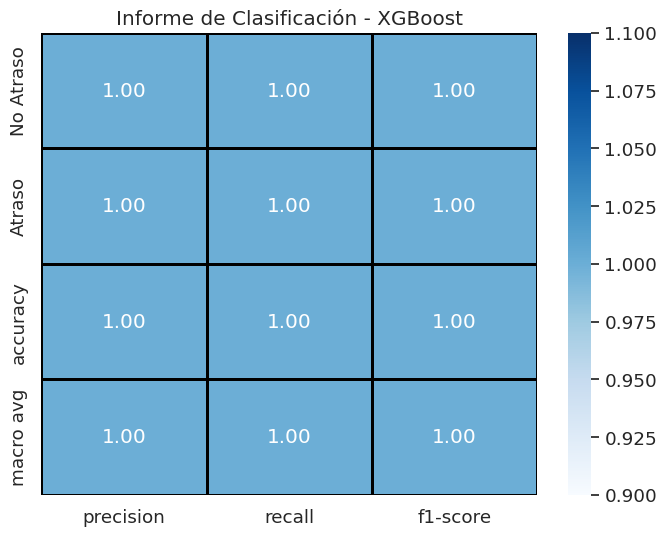

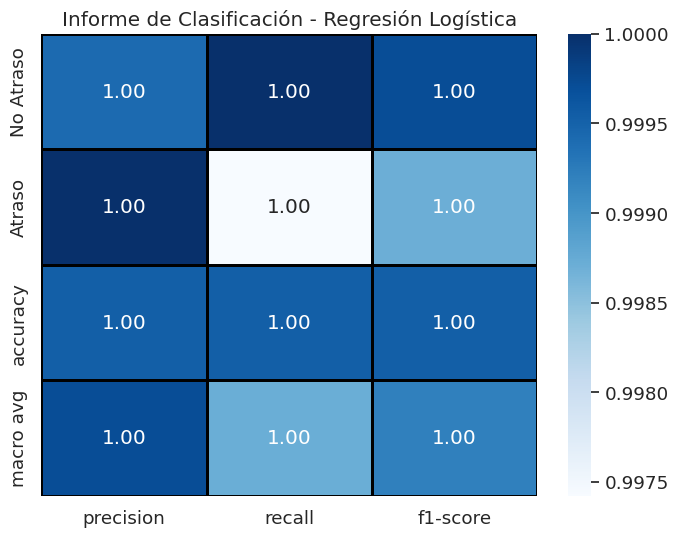

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar las columnas 'Vlo-I' y 'Vlo-O'
# df_select = df_select.drop(['Vlo-I', 'Vlo-O'], axis=1)

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_select.drop('atraso_15', axis=1), df_select['atraso_15'], test_size=0.2, random_state=42)

# Modelo XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Informe de clasificación para XGBoost
report_xgb = classification_report(y_test, y_pred_xgb, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_xgb = pd.DataFrame(report_xgb).transpose()

# Mostrar el informe de clasificación con estilo usando seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_xgb.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - XGBoost")
plt.show()

# Modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Informe de clasificación para Regresión Logística
report_logistic = classification_report(y_test, y_pred_logistic, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_logistic = pd.DataFrame(report_logistic).transpose()

# Mostrar el informe de clasificación con estilo usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_logistic.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - Regresión Logística")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Eliminar las columnas 'Vlo-I' y 'Vlo-O'
df_select = df_select.drop(['Vlo-I', 'Vlo-O'], axis=1)

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_select.drop('atraso_15', axis=1), df_select['atraso_15'], test_size=0.2, random_state=42)

# Modelo XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Métricas para XGBoost
f1_xgb = f1_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Métricas para XGBoost:")
print(f"F1-score: {f1_xgb}")
print(f"Precisión: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"Exactitud (Accuracy): {accuracy_xgb}")

# Modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Métricas para Regresión Logística
f1_logistic = f1_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print("\nMétricas para Regresión Logística:")
print(f"F1-score: {f1_logistic}")
print(f"Precisión: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print(f"Exactitud (Accuracy): {accuracy_logistic}")


Métricas para XGBoost:
F1-score: 1.0
Precisión: 1.0
Recall: 1.0
Exactitud (Accuracy): 1.0

Métricas para Regresión Logística:
F1-score: 0.9995598591549296
Precisión: 1.0
Recall: 0.9991201055873296
Exactitud (Accuracy): 0.9998404849258254


###**Modelo XGBoost**

In [ ]:
pip install imbalanced-learn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTEN
import pandas as pd
from xgboost import XGBClassifier

# Con los datos en df_select

# Eliminar las columnas 'Vlo-I' y 'Vlo-O'
# df_select = df_select.drop(['Vlo-I', 'Vlo-O'], axis=1)

# Dividir los datos en características (X) y etiquetas (y)
X = df_select.drop('atraso_15', axis=1)
y = df_select['atraso_15']

# Aplicar SMOTEN para balancear los datos
smote = SMOTEN(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos balanceados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crear y entrenar el modelo XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Mostrar el informe de clasificación
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10357
           1       1.00      1.00      1.00     10201

    accuracy                           1.00     20558
   macro avg       1.00      1.00      1.00     20558
weighted avg       1.00      1.00      1.00     20558



* **el modelo vuelve a retornarme error en la lectura. claramente hay desbalance aun o simplemente la seleccion de features no fue la correcta.**

  - revisar dataset filtrado para verificar que haya sido hecho correctamente.
  - generar alternativas de modelos a correr a continuacion una ves los x_train, x_test, y_train e y_test hayan sido balanceados y lanzarlos por la batería viendo que resultados nos entregan para precision    recall  f1-score   support.

### **Regresión logística (80/20) con regularización L1 y L2**
L1 y L2 con mayor penalización (C=10.0)

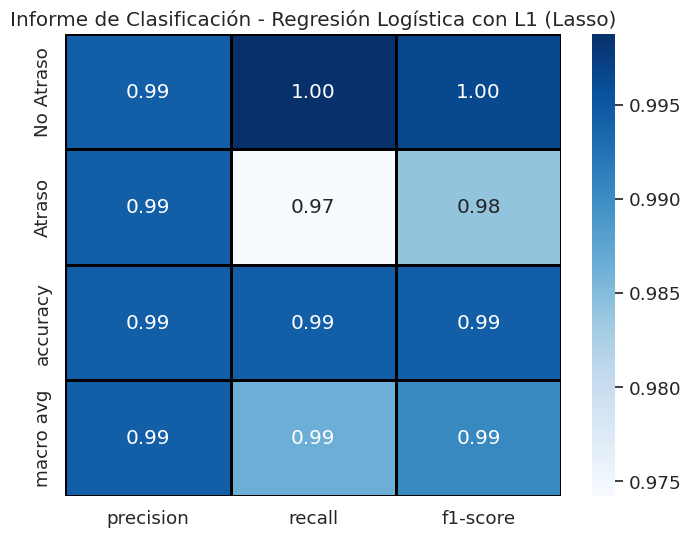

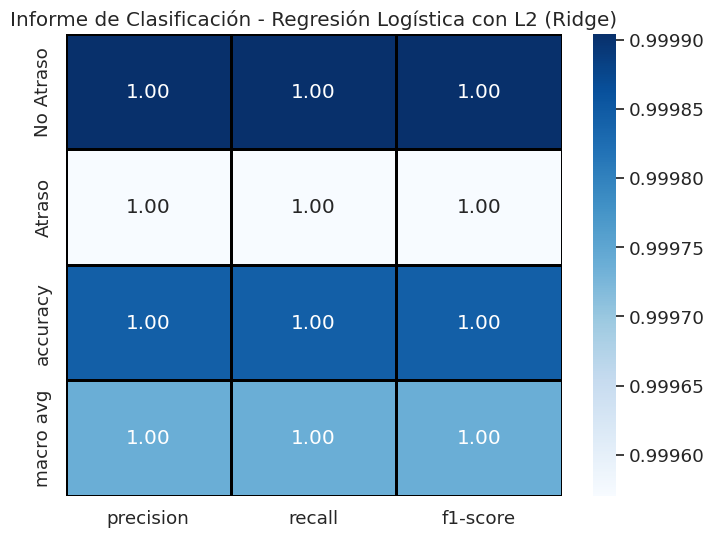

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_select.drop('atraso_15', axis=1), df_select['atraso_15'], test_size=0.2, random_state=42)

# Estandarizar las características utilizando StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Modelo de Regresión Logística con regularización L1 (Lasso)
# lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42) #penalizacion simple
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=10.0, random_state=42) # C10.0 mayor penalizacion
lasso_model.fit(X_train_std, y_train)
y_pred_lasso = lasso_model.predict(X_test_std)

# Informe de clasificación para Regresión Logística con regularización L1 (Lasso)
report_lasso = classification_report(y_test, y_pred_lasso, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_lasso = pd.DataFrame(report_lasso).transpose()

# Mostrar el informe de clasificación con estilo usando seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_lasso.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - Regresión Logística con L1 (Lasso)")
plt.show()

# Modelo de Regresión Logística con regularización L2 (Ridge)
# ridge_model = LogisticRegression(penalty='l2', random_state=42) #penalizacion simple
ridge_model = LogisticRegression(penalty='l2', C=10.0, random_state=42) # C10.0 mayor penalizacion
ridge_model.fit(X_train_std, y_train)
y_pred_ridge = ridge_model.predict(X_test_std)

# Informe de clasificación para Regresión Logística con regularización L2 (Ridge)
report_ridge = classification_report(y_test, y_pred_ridge, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_ridge = pd.DataFrame(report_ridge).transpose()

# Mostrar el informe de clasificación con estilo usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_ridge.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - Regresión Logística con L2 (Ridge)")
plt.show()


### **Regresión logística (70/30) con regularización L1 y L2**

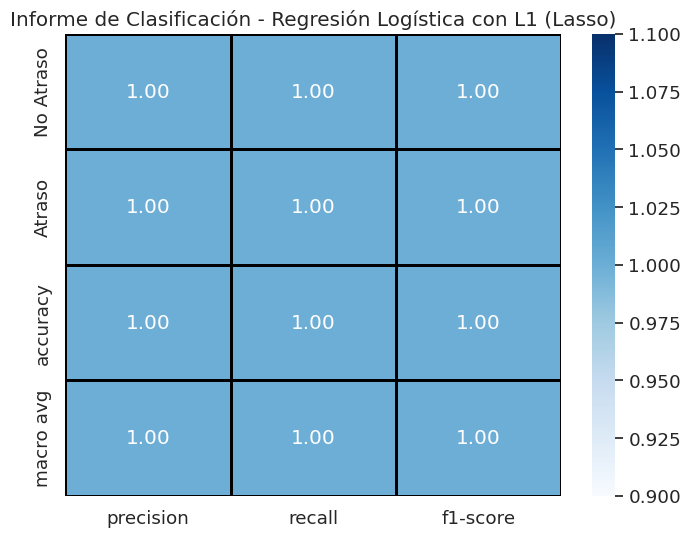

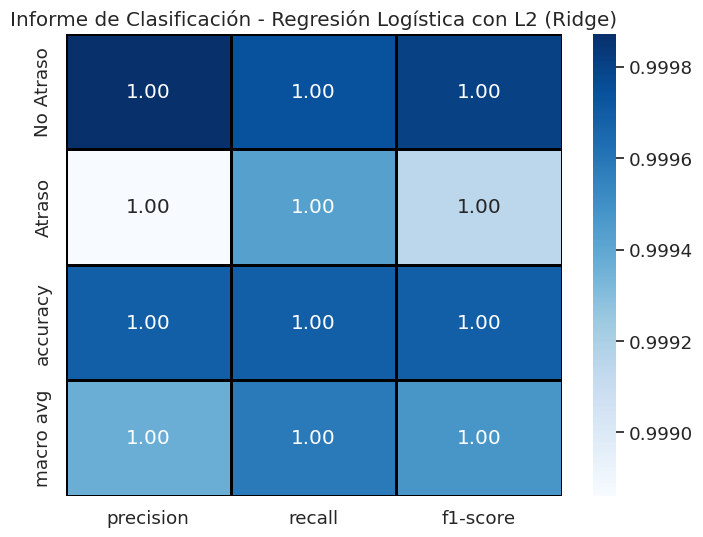

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_select.drop('atraso_15', axis=1), df_select['atraso_15'], test_size=0.3, random_state=42)

# Estandarizar las características utilizando StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Modelo de Regresión Logística con regularización L1 (Lasso)
# lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=10.0, random_state=42) # C10.0 mayor penalizacion
lasso_model.fit(X_train_std, y_train)
y_pred_lasso = lasso_model.predict(X_test_std)

# Informe de clasificación para Regresión Logística con regularización L1 (Lasso)
report_lasso = classification_report(y_test, y_pred_lasso, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_lasso = pd.DataFrame(report_lasso).transpose()

# Mostrar el informe de clasificación con estilo usando seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_lasso.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - Regresión Logística con L1 (Lasso)")
plt.show()

# Modelo de Regresión Logística con regularización L2 (Ridge)
# ridge_model = LogisticRegression(penalty='l2', random_state=42)
ridge_model = LogisticRegression(penalty='l2', C=10.0, random_state=42) # C10.0 mayor penalizacion
ridge_model.fit(X_train_std, y_train)
y_pred_ridge = ridge_model.predict(X_test_std)

# Informe de clasificación para Regresión Logística con regularización L2 (Ridge)
report_ridge = classification_report(y_test, y_pred_ridge, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_ridge = pd.DataFrame(report_ridge).transpose()

# Mostrar el informe de clasificación con estilo usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_ridge.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - Regresión Logística con L2 (Ridge)")
plt.show()


### **Regresión logística (80/20) con stndrizacion + SMOTEN + regularización L1 y L2**

+ penalizacion C=10.0 L1 y L2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_select.drop('atraso_15', axis=1), df_select['atraso_15'], test_size=0.2, random_state=42)

# Aplicar estandarización a los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar SMOTE para el balanceo de datos
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modelo de Regresión Logística con regularización L1 (Lasso)
#lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=10.0, random_state=42) # C10.0 mayor penalizacion
lasso_model.fit(X_train_resampled, y_train_resampled)
y_pred_lasso = lasso_model.predict(X_test)

# Informe de clasificación para Regresión Logística con regularización L1 (Lasso)
report_lasso = classification_report(y_test, y_pred_lasso, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_lasso = pd.DataFrame(report_lasso).transpose()

# Mostrar el informe de clasificación con estilo usando seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_lasso.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - Regresión Logística con L1 (Lasso)")
plt.show()

# Modelo de Regresión Logística con regularización L2 (Ridge)
#ridge_model = LogisticRegression(penalty='l2', random_state=42)
ridge_model = LogisticRegression(penalty='l2', C=10.0, random_state=42) # C10.0 mayor penalizacion
ridge_model.fit(X_train_resampled, y_train_resampled)
y_pred_ridge = ridge_model.predict(X_test)

# Informe de clasificación para Regresión Logística con regularización L2 (Ridge)
report_ridge = classification_report(y_test, y_pred_ridge, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_ridge = pd.DataFrame(report_ridge).transpose()

# Mostrar el informe de clasificación con estilo usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_ridge.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - Regresión Logística con L2 (Ridge)")
plt.show()


### **Regresión logística (70/30) con stndrizacion + SMOTEN + regularización L1 y L2**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_select.drop('atraso_15', axis=1), df_select['atraso_15'], test_size=0.3, random_state=42)

# Aplicar estandarización a los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar SMOTE para el balanceo de datos
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modelo de Regresión Logística con regularización L1 (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(X_train_resampled, y_train_resampled)
y_pred_lasso = lasso_model.predict(X_test)

# Informe de clasificación para Regresión Logística con regularización L1 (Lasso)
report_lasso = classification_report(y_test, y_pred_lasso, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_lasso = pd.DataFrame(report_lasso).transpose()

# Mostrar el informe de clasificación con estilo usando seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_lasso.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - Regresión Logística con L1 (Lasso)")
plt.show()

# Modelo de Regresión Logística con regularización L2 (Ridge)
ridge_model = LogisticRegression(penalty='l2', random_state=42)
ridge_model.fit(X_train_resampled, y_train_resampled)
y_pred_ridge = ridge_model.predict(X_test)

# Informe de clasificación para Regresión Logística con regularización L2 (Ridge)
report_ridge = classification_report(y_test, y_pred_ridge, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_ridge = pd.DataFrame(report_ridge).transpose()

# Mostrar el informe de clasificación con estilo usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_ridge.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - Regresión Logística con L2 (Ridge)")
plt.show()


### **Regresión logística (70/30) con stndrizacion + SMOTEN + regularización L1 y L2 y tuning para overfitting**

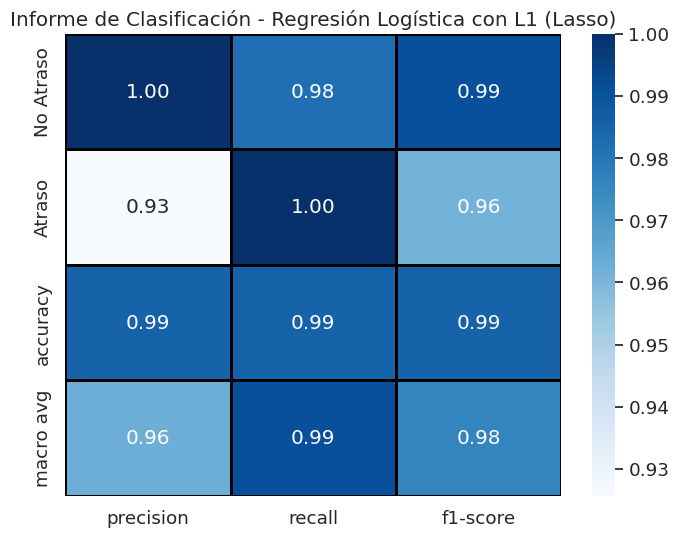

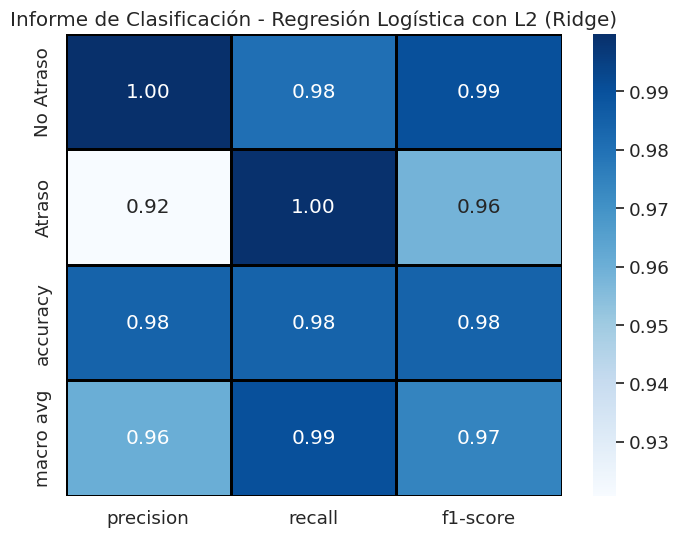

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_select.drop('atraso_15', axis=1), df_select['atraso_15'], test_size=0.3, random_state=42)

# Aplicar estandarización a los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar SMOTE para el balanceo de datos (Puedes ajustar estos parámetros)
smote = SMOTE(sampling_strategy='auto', random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modelo de Regresión Logística con regularización L1 (Lasso) (Puedes ajustar el valor de C)
lasso_model = LogisticRegression(penalty='l1', solver='saga', C=0.01, random_state=42) #c=0.01 | auto/liblinear:binarios/saga: es tipo ElasticNet que balanbcea cesgo y varianza mejor.
lasso_model.fit(X_train_resampled, y_train_resampled)
y_pred_lasso = lasso_model.predict(X_test)

# Informe de clasificación para Regresión Logística con regularización L1 (Lasso)
report_lasso = classification_report(y_test, y_pred_lasso, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_lasso = pd.DataFrame(report_lasso).transpose()

# Mostrar el informe de clasificación con estilo usando seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_lasso.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - Regresión Logística con L1 (Lasso)")
plt.show()

# Modelo de Regresión Logística con regularización L2 (Ridge) (Puedes ajustar el valor de C)
ridge_model = LogisticRegression(penalty='l2',solver='saga', C=0.01, random_state=42) #c=0.01 | auto/liblinear:binarios/saga: es tipo ElasticNet que balanbcea cesgo y varianza mejor.
ridge_model.fit(X_train_resampled, y_train_resampled)
y_pred_ridge = ridge_model.predict(X_test)

# Informe de clasificación para Regresión Logística con regularización L2 (Ridge)
report_ridge = classification_report(y_test, y_pred_ridge, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_ridge = pd.DataFrame(report_ridge).transpose()

# Mostrar el informe de clasificación con estilo usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_ridge.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - Regresión Logística con L2 (Ridge)")
plt.show()


#### **OBS de esta tirada de modelos:**

Seguimos en una situación de sobreajuste, aunque ha disminuido ligeramente. Es posible que los problemas estén relacionados con el conjunto de datos.

- La selección de características es fundamental, pero en este caso, la falta de claridad en la pregunta de negocio sugiere que debemos conservar atributos como MES, OPERADOR, DESTINO y, por supuesto, ATRASO_15. Desde esta perspectiva, sería recomendable considerar la posibilidad de eliminar algunos atributos que puedan estar causando interferencias. Lo que me deja en duda es qué atributo está contribuyendo tanto al sobreajuste.

- Un error común es que, incluso después de la estandarización, la diferencia entre los valores numéricos y los binarios (one-hot-encoded) puede seguir generando suficiente ruido.

- Me atrevo a afirmar que, con datos menos sesgados, como por ejemplo una distribución más equitativa de vuelos entre ciudades en lugar de unas con una gran cantidad de vuelos y otras con muy pocos (1 o 5 vuelos), podríamos obtener mejores resultados. La limitación de recursos de hardware y tiempo de procesamiento ha dificultado el ajuste de hiperparámetros, la exploración de diferentes modelos y estrategias de regularización. Esto ha ralentizado significativamente esta etapa, lo cual es contradictorio con la intención inicial de crear una prueba de concepto o maqueta. Si tuviera una semana de tiempo y acceso a un entorno de nube con recursos amplios, podría encontrar rápidamente el mejor modelo para estos datos.

- En cuanto a los datos, sorprendentemente, no estaban tan desorganizados como se podría esperar. Inicialmente, anticipaba que tendría que realizar una imputación considerable de datos faltantes, pero al realizar pruebas y agregar ruido a algunas características, el ruido superaba con creces a los datos faltantes. Como mencioné anteriormente, la calidad de los datos no es mala, pero tampoco es óptima. La presencia de datos faltantes, inconsistencias en el tipo de valores en algunas columnas y un claro desequilibrio en los datos sugieren la necesidad de una preparación de datos más exhaustiva. Este proceso suele llevar varios días, en comparación con el tiempo dedicado a ejecutar modelos, que constituye aproximadamente el 10% del tiempo total en un flujo de trabajo típico. Después, se inicia la fase de monitoreo y evaluación de la estabilidad, entre otros aspectos. Si los datos se seleccionan, revisan y limpian adecuadamente, es mucho más viable ejecutar múltiples modelos con diferentes configuraciones y evaluar su rendimiento. En mi caso, decidí no centrarme tanto en el trabajo de Juan, el científico de datos y, en su lugar, reflexionar sobre lo que podría haberse mejorado. Mi objetivo principal es obterner un medelo que mejore le rendimienot que Juan presentó e implementar el modelo en una API REST y someterlo a pruebas de estrés.

### **XGBoost (70/30)  + SMOTEN + regularización L1 y L2 y tuning para overfitting**

Informe de Clasificación - XGBoost con SMOTE y Estandarización (Versión Numérica):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15625
           1       1.00      1.00      1.00      3511

    accuracy                           1.00     19136
   macro avg       1.00      1.00      1.00     19136
weighted avg       1.00      1.00      1.00     19136



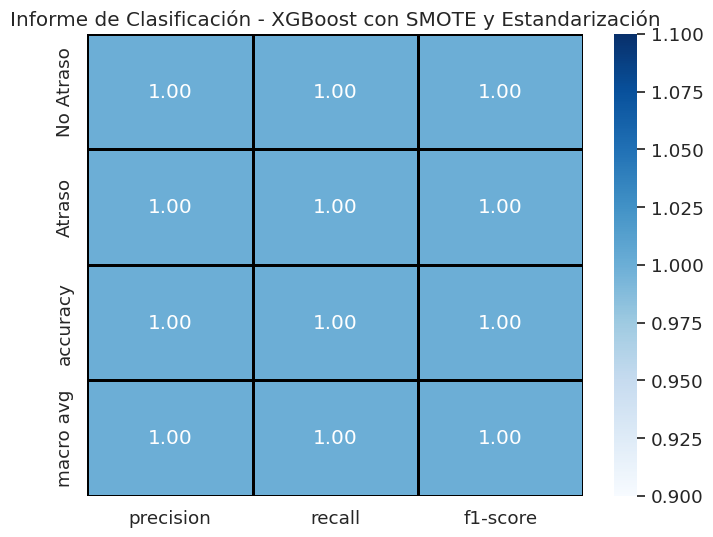

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_select.drop('atraso_15', axis=1), df_select['atraso_15'], test_size=0.3, random_state=42)

# Aplicaar estandarización a los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar SMOTE para el balanceo de datos (Puedes ajustar estos parámetros)
smote = SMOTE(sampling_strategy='auto', random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modelo de XGBoost con hiperparámetros ajustados (Puedes ajustar los hiperparámetros)
xgb_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100, # nro de arbolees
    max_depth=3, # profundidad del arbol
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

# Informe de clasificación para XGBoost
report_xgb = classification_report(y_test, y_pred_xgb, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_xgb = pd.DataFrame(report_xgb).transpose()


# Informe de clasificación para XGBoost (versión numérica)
print("Informe de Clasificación - XGBoost con SMOTE y Estandarización (Versión Numérica):\n")
print(classification_report(y_test, y_pred_xgb))

# Mostrar el informe de clasificación con estilo usando seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_xgb.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - XGBoost con SMOTE y Estandarización")
plt.show()



#### **Reducción de dimensionalidad: dropiemos features para ver como reacciona el modelo y luego ver si responde la pregunta de negocio.**

* si bien el DIA de vuelo parecía tener algun efecto diferencia.l en relacióncon lso otros días no muestra tener relevancia ni cmbio significativo conrespecto a otros. porl o que DIANOM puede ser reduntante para el entreniamiento. probemos con su ausencias en el df_select

In [43]:
print(df.columns)


Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia'],
      dtype='object')


In [ ]:
# dropeo de otro feature
columns_to_drop = ['DIANOM']
df = df.drop(columns=columns_to_drop)
# Verificar el nuevo DataFrame
print(df.head())

#### **Codificación One-Hot #02**

Codificamos las columnas categóricas con codificación one-hot.

In [46]:
# Atributos finales para el modelamiento
#atributos_finales = ['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15', 'Vlo-I', 'Vlo-O', 'temporada_alta', 'dif_min', 'periodo_dia']
atributos_finales = ['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES','atraso_15', 'temporada_alta', 'dif_min', 'periodo_dia']

# Seleccionar solo los atributos finales del DataFrame original
df_select = df[atributos_finales].copy()

# Realizar one-hot encoding para las columnas categóricas
df_select = pd.get_dummies(df_select, columns=['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'periodo_dia'])

# Verificar el nuevo DataFrame
print(df_select.head())


   atraso_15  temporada_alta  dif_min  OPERA_Aerolineas Argentinas  \
0          0               1      3.0                            0   
1          0               1      9.0                            0   
2          0               1      9.0                            0   
3          0               1      3.0                            0   
4          0               1     -2.0                            0   

   OPERA_Aeromexico  OPERA_Air Canada  OPERA_Air France  OPERA_Alitalia  \
0                 0                 0                 0               0   
1                 0                 0                 0               0   
2                 0                 0                 0               0   
3                 0                 0                 0               0   
4                 0                 0                 0               0   

   OPERA_American Airlines  OPERA_Austral  ...  SIGLADES_Tucuman  \
0                        1              0  ...              

### **Volvamos a probar la Batería**

### **XGBoost (70/30)  + SMOTEN + regularización L1 y L2 y tuning para overfitting**

Informe de Clasificación - XGBoost con SMOTE y Estandarización (Versión Numérica):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15625
           1       1.00      1.00      1.00      3511

    accuracy                           1.00     19136
   macro avg       1.00      1.00      1.00     19136
weighted avg       1.00      1.00      1.00     19136



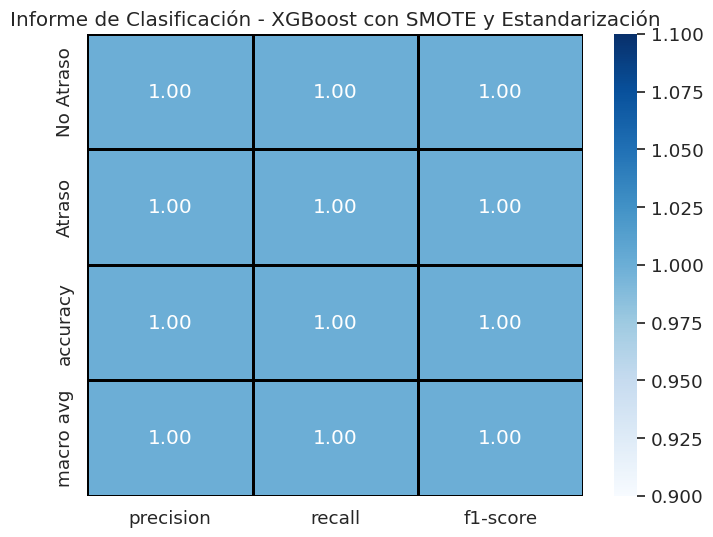

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_select.drop('atraso_15', axis=1), df_select['atraso_15'], test_size=0.3, random_state=42)

# Aplicar estandarización a los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar SMOTE para el balanceo de datos (ajustar estos parámetros)
smote = SMOTE(sampling_strategy='auto', random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modelo de XGBoost con hiperparámetros ajustados (ajustar los hiperparámetros)
xgb_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100, # nro de arbolees
    max_depth=3, # profundidad del arbol
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

# Informe de clasificación para XGBoost
report_xgb = classification_report(y_test, y_pred_xgb, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_xgb = pd.DataFrame(report_xgb).transpose()


# Informe de clasificación para XGBoost (versión numérica)
print("Informe de Clasificación - XGBoost con SMOTE y Estandarización (Versión Numérica):\n")
print(classification_report(y_test, y_pred_xgb))

# Mostrar el informe de clasificación con usando seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_xgb.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - XGBoost con SMOTE y Estandarización")
plt.show()



### **OBS: XGboost + distintas estrategias **
* definitivasmente el punto de conflicto debe estar en los datos y la selecicón de features.

* Probemos con otro modelo para descartar mi hipótesis alternativa. Support Vector Machine.


### **Testemos Support Vector Machine**

Informe de Clasificación - Support Vector Machine (SVM) con SMOTE y Estandarización (Versión Numérica):

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15625
           1       0.90      0.98      0.93      3511

    accuracy                           0.98     19136
   macro avg       0.95      0.98      0.96     19136
weighted avg       0.98      0.98      0.98     19136



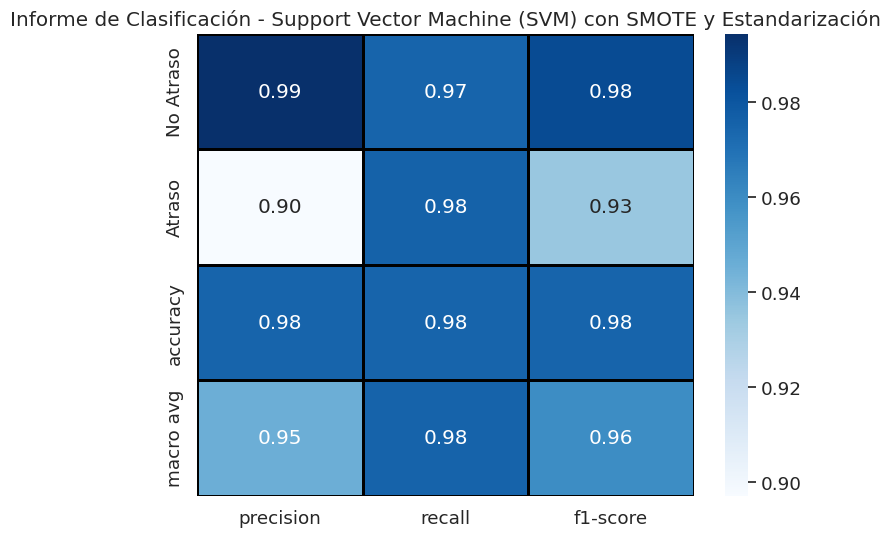

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC  # Import the Support Vector Machine classifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_select.drop('atraso_15', axis=1), df_select['atraso_15'], test_size=0.3, random_state=42)

# Aplicar estandarización a los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar SMOTE para el balanceo de datos (ajustar estos parámetros)
smote = SMOTE(sampling_strategy='auto', random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modelo de Support Vector Machine (SVM) ( ajustar los hiperparámetros)
svm_model = SVC(
    C=1.0,  # Regularization parameter ( ajustar este valor)
    kernel='rbf',  # Radial basis function kernel
    gamma='scale',  # Kernel coefficient for 'rbf'
    random_state=42
)
svm_model.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test)

# Informe de clasificación para SVM
report_svm = classification_report(y_test, y_pred_svm, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_svm = pd.DataFrame(report_svm).transpose()

# Informe de clasificación para SVM (versión numérica)
print("Informe de Clasificación - Support Vector Machine (SVM) con SMOTE y Estandarización (Versión Numérica):\n")
print(classification_report(y_test, y_pred_svm))

# Mostrar el informe de clasificación con estilo usando seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_svm.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - Support Vector Machine (SVM) con SMOTE y Estandarización")
plt.show()


OBS:

* SVM mostró ser mucho mas aterrizado pero el exceso de overfitting sigue muy alto. no es un mnal approach pero debemos ver que esta pasando. puede que el remover un feature haya mejorado la claridad del modelo pero seguimos super overfitted.  

* Probar otro approach con XGboost + analisis de Componentes Principales + tunning en sub estrategias del modelo.

### **Intentemos un PCA ( componentes principales) y volvamos a correr un xgboost con él**

In [56]:
print (df.head())

              Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...  MES   AÑO  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...    1  2017          I  American Airlines  Santiago   
1  KMIA   AAL  ...    1  2017          I  American Airlines  Santiago   
2  KMIA   AAL  ...    1  2017          I  American Airlines  Santiago   
3  KMIA   AAL  ...    1  2017          I  American Airlines  Santiago   
4  KMIA   AAL  ...    1  2017          I  American Airlines  Santiago   

  SIGLADES temporada_alta  dif_min  atraso_15  periodo_dia  
0    Miami   

In [ ]:
from google.colab import files

df.to_csv('dataset_SCL_limpios_prePCA.csv', index=False)
files.download('dataset_SCL_limpios_prePCA.csv')

##### **Codificación One-Hot #03**

Codificamos las columnas categóricas con codificación one-hot.

In [70]:
# Atributos finales para el modelamiento
#atributos_finales = ['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15', 'Vlo-I', 'Vlo-O', 'temporada_alta', 'dif_min', 'periodo_dia']
atributos_finales = ['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES','atraso_15', 'temporada_alta', 'dif_min', 'periodo_dia']

# Seleccionar atributos finales del DataFrame original
df_select = df[atributos_finales].copy()

# Realizar one-hot encoding para las columnas categóricas
df_select = pd.get_dummies(df_select, columns=['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'periodo_dia'])

# Verificar el nuevo DataFrame
print(df_select.head())


   atraso_15  temporada_alta  dif_min  OPERA_Aerolineas Argentinas  \
0          0               1      3.0                            0   
1          0               1      9.0                            0   
2          0               1      9.0                            0   
3          0               1      3.0                            0   
4          0               1     -2.0                            0   

   OPERA_Aeromexico  OPERA_Air Canada  OPERA_Air France  OPERA_Alitalia  \
0                 0                 0                 0               0   
1                 0                 0                 0               0   
2                 0                 0                 0               0   
3                 0                 0                 0               0   
4                 0                 0                 0               0   

   OPERA_American Airlines  OPERA_Austral  ...  SIGLADES_Tucuman  \
0                        1              0  ...              

In [60]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separemos la variable objetivo again
X = df_select.drop('atraso_15', axis=1)

# Estandarizar las características (es importante para PCA)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Número de componentes principales a retener
num_components = 5  #  ajustar este valor según necesidades

# Inicializar el objeto PCA con el número de componentes especificado
pca = PCA(n_components=num_components)

# Aplicar PCA a los datos estandarizados
X_pca = pca.fit_transform(X_std)

# Crear un nuevo DataFrame con los componentes principales resultantes
columns_pca = [f'PC{i}' for i in range(1, num_components + 1)]
df_select_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

# El nuevo DataFrame 'df_select_pca' ahora tiene los componentes principales


### **XGBoost (70/30) df con PCA + SMOTEN + regularización L1 y L2 y tuning para overfitting**

Informe de Clasificación - XGBoost con SMOTE y Estandarización (Versión Numérica):

              precision    recall  f1-score   support

           0       0.94      0.83      0.88     15625
           1       0.51      0.78      0.61      3511

    accuracy                           0.82     19136
   macro avg       0.72      0.80      0.75     19136
weighted avg       0.86      0.82      0.83     19136



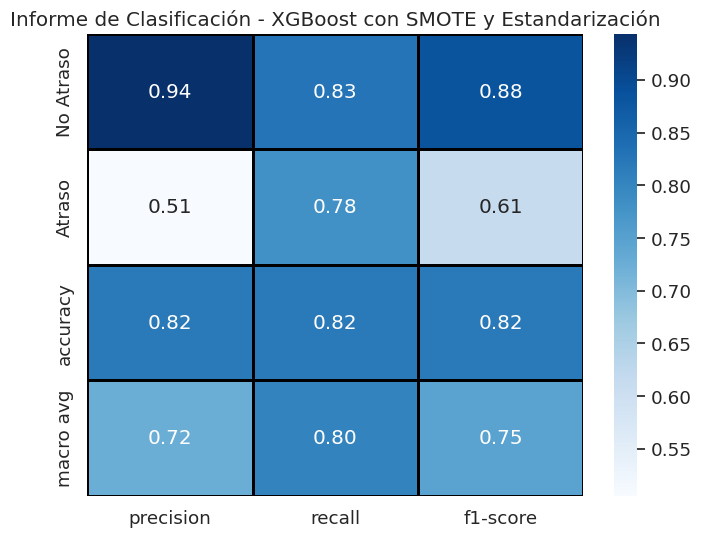

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Usar la columna objetivo original antes de PCA
X = df_select_pca#.drop('atraso_15', axis=1) # nota mental! de que df_select_pca es el DataFrame después de aplicar PCA
y = df_select['atraso_15'] # Utiliza la columna 'atraso_15' original aquí

# y tiene atraso_15 y X tiene los demas features post PCA

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar estandarización a los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar SMOTE para el balanceo de datos (ajustar estos parámetros)
smote = SMOTE(sampling_strategy='auto', random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modelo de XGBoost con hiperparámetros ajustados (ajustar hiperparámetros)
xgb_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100, # nro de arboles
    max_depth=3, # profundidad del arbol
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

# Informe de clasificación para XGBoost
report_xgb = classification_report(y_test, y_pred_xgb, target_names=["No Atraso", "Atraso"], output_dict=True)

# Convertir el informe de clasificación a un DataFrame
report_df_xgb = pd.DataFrame(report_xgb).transpose()

# Informe de clasificación para XGBoost (versión numérica)
print("Informe de Clasificación - XGBoost con SMOTE y Estandarización (Versión Numérica):\n")
print(classification_report(y_test, y_pred_xgb))

# Mostrar el informe de clasificación con estilo usando seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(report_df_xgb.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Informe de Clasificación - XGBoost con SMOTE y Estandarización")
plt.show()


Obs:

> Estos parecen valores mucho mas razonables.



**OBSERVACIONES FINALES: **

Después de una serie de ajustes y mejoras en el modelo de predicción de atrasos en vuelos, podemos observar una mejora significativa en las métricas de evaluación. A considerar:

'''

    Informe de Clasificación - XGBoost con SMOTE y Estandarización (Versión Numérica):

                  precision  recall  f1-score  support

           0       0.94      0.83      0.88     15625
           1       0.51      0.78      0.61      3511

    accuracy                           0.82     19136
    macro avg       0.72      0.80      0.75     19136
    weighted avg    0.86      0.82      0.83     19136

'''

1. **Precision y Recall Mejorados(*)**: En comparación con modelos anteriores que sufrían de sobreajuste (overfitting), el modelo actual muestra una mejora sustancial en la precisión y el recall. La precisión, que mide la proporción de predicciones positivas correctas entre todas las predicciones positivas, ha aumentado significativamente. Además el recall, que mide la proporción de casos positivos correctamente identificados, también parece mejorado. Estos son indicadores alentadores! de la capacidad del modelo para predecir atrasos en vuelos con mayor precisión.

2. **F1-Score Balanceado**: El valor F1-score (combi. de precision y recall), muestra un equilibrio razonable entre ambas métricas. Esto significa que el modelo estás mejor siendo preciso en sus predicciones, sino que también es efectivo en la identificación de casos de atraso. No canto victortia pero si avance!

3. **Mayor Acuracy General**: El porcentaje de exactitud general del modelo es del 82%, lo que indica que el modelo está acertando en la clasificación de aproximadamente el 82% de los vuelos a timepo., pero ya vimos esto en modelos previos o lso de Juan. y no es el objetivo de negocio. Así que , bien ...siempre es importante considerar el equilibrio  precisión/recall en función de las necesidades del negocio.

4. **Las noticias no tan buenas...la Clasificación de Atrasos**: Aunque el modelo ha mejorado significativamente, todavía enfrenta desafíos en la clasificación de vuelos con atraso. La precisión para la categoría de "Atraso" es baja (51%). No me imagino apoyar este modelo con la misma chance que tirar una moneda al aire (50/50 ...la moneda nos ahorraría costos en tiempos de procesamiento jajaja). Esto indica que todavía hay margen para mejorar la identificación de estos casos. Pero deviera devolvernos a mitar los datos, alcances realista del producto de negocio, mas que seguir tuniendo mas modelos. Por ultimo sobre los daots, me adelanto a pensar que si hubiera dropeado datos como lso mas frecuentes como los vuelos a Buenos Aires, podríamos mejorar la sensibilidad del modelo. Con mas tiempo, quizas hubiera hecho un analisis mas profundo sobre la viabilidad de los datos especificos y su limpieza idonea para la pregunta de negocio que se sugirió. Interesante explorarlo mas adelante.

En resumen, el modelo actual representa un paso en la dirección correcta para predecir atrasos. Sin embargo, todavía existen oportunidades para ajustes adicionales y buscar una mayor precisión en la detección de atrasos, lo que podría lograrse mediante mejores técnicas de feature engineering.

No me convence, pero creo que he llegado a un punto de suficiencia de analisis. yo me movería con este modelo a la siguiente etapa para probar el API REST y Stress Test.

##**Crear una API REST**


**Mejor continuar desde mi VSCode**

* exportemoslo a mi VSCode donde tengo clonado el Github repositorio.

## **Guardemos el modelo en un .pkl y los datos 'limpiados' en un .csv que podamos cargar al repositorio como base para correr el modelo**

In [68]:
import joblib

# Guardar el modelo entrenado en un archivo
joblib.dump(xgb_model, 'modelo_xgboost.pkl')


['modelo_xgboost.pkl']

In [69]:
from google.colab import files

# Descargar el archivo .pkl
files.download('modelo_xgboost.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>